In [1]:
import sys
import cv2
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.mediapipe.model import mediapipe_model
from models.mediapipe.map_mp2coco import MP2COCO

# Read image

In [2]:
640*1.5,960*1.5

(960.0, 1440.0)

(3024, 4032, 3)


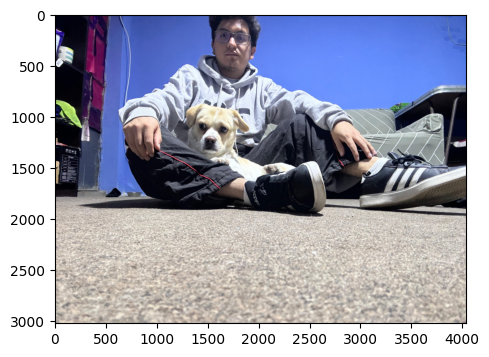

In [3]:
img     = cv2.imread("../../data/images/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(8,4))
plt.imshow(img_rgb)
plt.show()

# Load model

    face_config = {
        'min_detection_confidence': 0.5,
        'min_tracking_confidence': 0.5,
        'max_num_faces': 1,
        'refine_landmarks':True
    }

    hands_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'max_num_hands': 2,
        'model_complexity': 1
    }
                    
    pose_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'model_complexity': 2,
        'smooth_landmarks':True,
        'enable_segmentation':False,
        'smooth_segmentation':True
    }

    model = mediapipe_model(models= ['hand', 'face', 'pose'], image_mode= True, 
                    face_config= face_config, hands_config=hands_config, pose_config=pose_config)

In [4]:
model = mediapipe_model()

I0000 00:00:1715166143.297012  954069 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715166143.299179  954155 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1715166143.304729  954069 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715166143.305728  954170 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
I0000 00:00:1715166143.312516  954069 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715166143.313709  954185 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)


In [5]:
results = model.predict(frame_rgb=img_rgb)

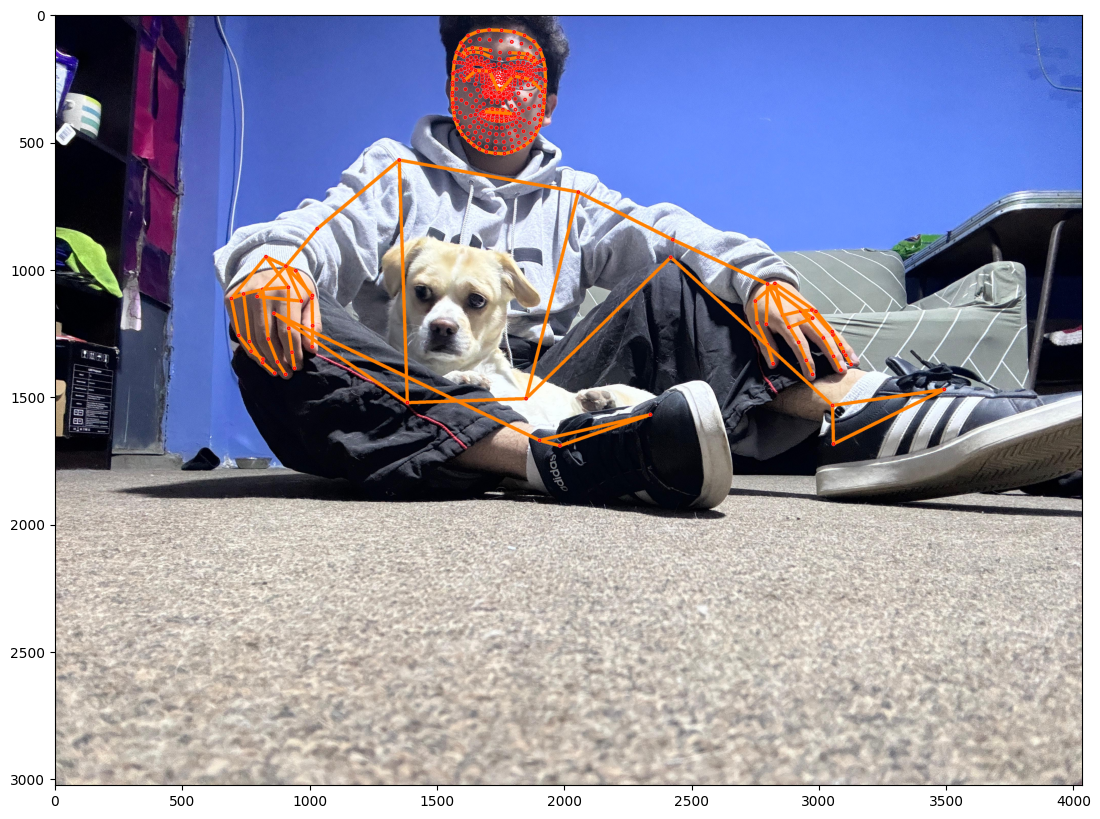

In [6]:
ldk_config = {
    'circle_radius':5,
    'thickness':4,
    'color':(255,0,0)
}
con_config = {
    'circle_radius':5,
    'thickness':12,
    'color':(255,128,0)
    #'color':(0,255,255)
}

img_rgb_new = model.draw_mediapipe(img_rgb,results,landmark_config=ldk_config,connection_config=con_config)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb_new)
plt.show()

Time: 0.0009415149688720703


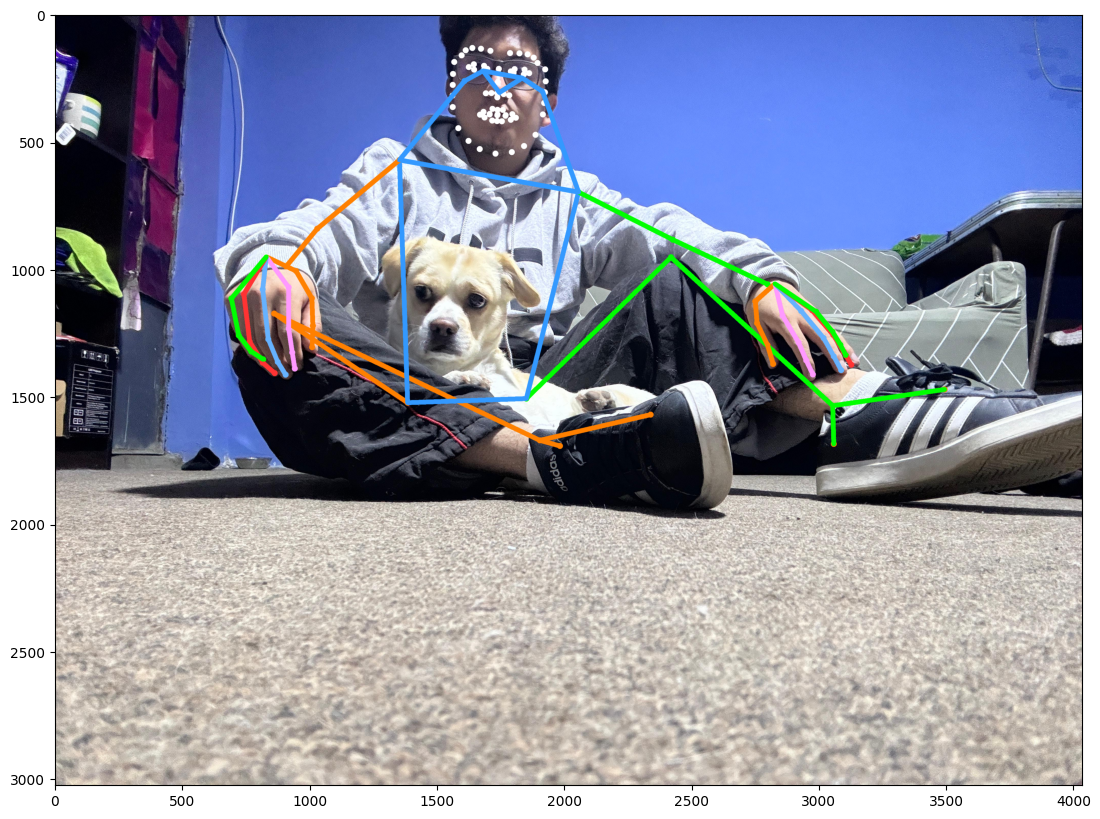

In [48]:
import time
maper = MP2COCO()

start = time.time()
keypoints_new, scores_new = maper.process(img_rgb,results)
print("Time:",time.time()-start)

from rtmlib import Wholebody, draw_skeleton
import copy 

img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints_new, scores_new, kpt_thr=0.5,
                             line_width=18,radius=12)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb_new2)
plt.show()


In [8]:
import numpy as np 

keypoints = np.zeros((133, 2))#np.array([[0,0] for i in range(133)])
scores    = np.zeros((133,))#np.array([0 for i in range(133)])

print("keypoints:",len(keypoints))

def get_xy_landmarks(list_landmarks,show=False):
    list_points = []
    list_scores = []

    for idx, value in enumerate(list_landmarks.landmark):
        x,y,z = value.x,value.y,value.z
        if show:
            print(f"""{value.HasField('visibility')} ,
            {value.visibility < model.mp_drawing._VISIBILITY_THRESHOLD} ,
            {value.HasField('presence')} ,
            {value.presence < model.mp_drawing._PRESENCE_THRESHOLD}""")
            
        if ((value.HasField('visibility') and
            value.visibility < model.mp_drawing._VISIBILITY_THRESHOLD) or
            (value.HasField('presence') and
            value.presence < model.mp_drawing._PRESENCE_THRESHOLD)):
            list_points.append([0,0])
            list_scores.append(0)
        else:
            list_points.append([x,y])
            list_scores.append(1)
    return list_points,list_scores


keypoints: 133


# Parsing HANDS

In [9]:
left_hand_landmarks = None
right_hand_landmarks = None
if results['hands'].multi_hand_landmarks is not None:
    left_hand_landmarks  = results['hands'].multi_hand_landmarks[0]
    if len(results['hands'].multi_hand_landmarks)==2:
        right_hand_landmarks = results['hands'].multi_hand_landmarks[1]

In [10]:
if left_hand_landmarks is not None:
    print(len(left_hand_landmarks.landmark))

21


In [11]:
if left_hand_landmarks is not None:
    print("adding")
    keypoints[91:112],scores[91:112]   = get_xy_landmarks(left_hand_landmarks)
if right_hand_landmarks is not None:
    print("adding")
    keypoints[112:133],scores[112:133] = get_xy_landmarks(right_hand_landmarks)

adding
adding


In [12]:
hand_map_id_mp2coco = {
    f"{i}":i+91 for i in range(0,21)
}

hand_map_id_mp2coco

{'0': 91,
 '1': 92,
 '2': 93,
 '3': 94,
 '4': 95,
 '5': 96,
 '6': 97,
 '7': 98,
 '8': 99,
 '9': 100,
 '10': 101,
 '11': 102,
 '12': 103,
 '13': 104,
 '14': 105,
 '15': 106,
 '16': 107,
 '17': 108,
 '18': 109,
 '19': 110,
 '20': 111}

In [13]:
hand_map_id_mp2coco = {
    f"{i}":i+112 for i in range(0,21)
}

hand_map_id_mp2coco

{'0': 112,
 '1': 113,
 '2': 114,
 '3': 115,
 '4': 116,
 '5': 117,
 '6': 118,
 '7': 119,
 '8': 120,
 '9': 121,
 '10': 122,
 '11': 123,
 '12': 124,
 '13': 125,
 '14': 126,
 '15': 127,
 '16': 128,
 '17': 129,
 '18': 130,
 '19': 131,
 '20': 132}

In [14]:
keypoints[91:112]

array([[0.70090926, 0.34875032],
       [0.68187636, 0.37161231],
       [0.68355644, 0.40013143],
       [0.69372046, 0.42840964],
       [0.69916868, 0.45298582],
       [0.70843995, 0.39016593],
       [0.72402966, 0.42515734],
       [0.73152053, 0.44849652],
       [0.73782486, 0.46671587],
       [0.72634947, 0.38431823],
       [0.7482115 , 0.41944489],
       [0.75814152, 0.44321179],
       [0.76530856, 0.46103242],
       [0.73709017, 0.38311735],
       [0.75758296, 0.41534755],
       [0.76775956, 0.43727338],
       [0.77523494, 0.45392168],
       [0.74099374, 0.38508981],
       [0.75688845, 0.41115758],
       [0.76467055, 0.42822754],
       [0.76998603, 0.44208238]])

In [15]:
hand_map_mp2coco = {
  "keypoint_id2coco_name": {
    "0": {
      "left": "left_hand_root",
      "right": "right_hand_root"
    },
    "1": {
      "left": "left_thumb1",
      "right": "right_thumb1"
    },
    "2": {
      "left": "left_thumb2",
      "right": "right_thumb2"
    },
    "3": {
      "left": "left_thumb3",
      "right": "right_thumb3"
    },
    "4": {
      "left": "left_thumb4",
      "right": "right_thumb4"
    },
    "5": {
      "left": "left_forefinger1",
      "right": "right_forefinger1"
    },
    "6": {
      "left": "left_forefinger2",
      "right": "right_forefinger2"
    },
    "7": {
      "left": "left_forefinger3",
      "right": "right_forefinger3"
    },
    "8": {
      "left": "left_forefinger4",
      "right": "right_forefinger4"
    },
    "9": {
      "left": "left_middle_finger1",
      "right": "right_middle_finger1"
    },
    "10": {
      "left": "left_middle_finger2",
      "right": "right_middle_finger2"
    },
    "11": {
      "left": "left_middle_finger3",
      "right": "right_middle_finger3"
    },
    "12": {
      "left": "left_middle_finger4",
      "right": "right_middle_finger4"
    },
    "13": {
      "left": "left_ring_finger1",
      "right": "right_ring_finger1"
    },
    "14": {
      "left": "left_ring_finger2",
      "right": "right_ring_finger2"
    },
    "15": {
      "left": "left_ring_finger3",
      "right": "right_ring_finger3"
    },
    "16": {
      "left": "left_ring_finger4",
      "right": "right_ring_finger4"
    },
    "17": {
      "left": "left_pinky_finger1",
      "right": "right_pinky_finger1"
    },
    "18": {
      "left": "left_pinky_finger2",
      "right": "right_pinky_finger2"
    },
    "19": {
      "left": "left_pinky_finger3",
      "right": "right_pinky_finger3"
    },
    "20": {
      "left": "left_pinky_finger4",
      "right": "right_pinky_finger4"
    }
  }
}

# Parsing POSE

In [16]:
keypoints[:20]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [17]:
if results['pose'].pose_landmarks != None:
    pose_landmarks = results['pose'].pose_landmarks
    print(len(pose_landmarks.landmark))

33


In [18]:
for i,landmark in enumerate(pose_landmarks.landmark):
    print(i,landmark.HasField('visibility'),landmark.visibility,"||",landmark.HasField('presence'),landmark.presence)

0 True 1.0 || False 0.0
1 True 1.0 || False 0.0
2 True 1.0 || False 0.0
3 True 1.0 || False 0.0
4 True 1.0 || False 0.0
5 True 1.0 || False 0.0
6 True 1.0 || False 0.0
7 True 0.9999998807907104 || False 0.0
8 True 1.0 || False 0.0
9 True 0.9999998807907104 || False 0.0
10 True 0.9999998807907104 || False 0.0
11 True 0.9999942779541016 || False 0.0
12 True 0.9999988079071045 || False 0.0
13 True 0.8772569298744202 || False 0.0
14 True 0.976325273513794 || False 0.0
15 True 0.9460421800613403 || False 0.0
16 True 0.9966726303100586 || False 0.0
17 True 0.9609054923057556 || False 0.0
18 True 0.9969314336776733 || False 0.0
19 True 0.964729905128479 || False 0.0
20 True 0.9972931742668152 || False 0.0
21 True 0.960489809513092 || False 0.0
22 True 0.9963763356208801 || False 0.0
23 True 0.999948263168335 || False 0.0
24 True 0.999966025352478 || False 0.0
25 True 0.9805120229721069 || False 0.0
26 True 0.9981436729431152 || False 0.0
27 True 0.9736760854721069 || False 0.0
28 True 0.91551

In [19]:
pose_map_mp2coco = {
    "keypoint_id2coco_name": {
        "0": "nose",
        "2": "left_eye",
        "5": "right_eye",
        "7": "left_ear",
        "8": "right_ear",
        "11": "left_shoulder",
        "12": "right_shoulder",
        "13": "left_elbow",
        "14": "right_elbow",
        "15": "left_wrist",
        "16": "right_wrist",
        "23": "left_hip",
        "24": "right_hip",
        "25": "left_knee",
        "26": "right_knee",
        "27": ["left_ankle","left_heel"],
        "28": ["right_ankle","right_heel"],
        "29": "left_big_toe",
        "30": "right_big_toe",
        "31": "left_small_toe",
        "32": "right_small_toe"
    },
    
    "keypoint_mp2coco_id": {
        "0": 0,
        "2": 1,
        "5": 2,
        "7": 3,
        "8": 4,
        "11": 5,
        "12": 6,
        "13": 7,
        "14": 8,
        "15": 9,
        "16": 10,
        "23": 11,
        "24": 12,
        "25": 13,
        "26": 14,
        "27": [15,19],
        "28": [16,22],
        "29": 17,
        "30": 20,
        "31": 18,
        "32": 21
    }
}

In [20]:
if pose_landmarks is not None:
    keypoints_pose,scores_pose = get_xy_landmarks(pose_landmarks)

In [21]:
for i in range(len(keypoints_pose)):
    if str(i) in pose_map_mp2coco['keypoint_mp2coco_id']:
        id = pose_map_mp2coco['keypoint_mp2coco_id'][str(i)]
        if type(id) is list:
            for j in id:
                keypoints[j] = keypoints_pose[i]
                scores[j] = scores_pose[i]
        else:
            keypoints[id] = keypoints_pose[i]
            scores[id] = scores_pose[i]


# Parsing Face

In [22]:
face_landmark = None
if results['face'].multi_face_landmarks != None:
    faces_landmarks = results['face'].multi_face_landmarks
    if len(faces_landmarks)>=0:
        face_landmark = faces_landmarks[0]
        print(len(face_landmark.landmark))

468


In [23]:
len(faces_landmarks)

1

In [24]:
for i,landmark in enumerate(face_landmark.landmark):
    print(i,landmark.HasField('visibility'),landmark.visibility,"||",landmark.HasField('presence'),landmark.presence)
    if i>10:
        break

0 False 0.0 || False 0.0
1 False 0.0 || False 0.0
2 False 0.0 || False 0.0
3 False 0.0 || False 0.0
4 False 0.0 || False 0.0
5 False 0.0 || False 0.0
6 False 0.0 || False 0.0
7 False 0.0 || False 0.0
8 False 0.0 || False 0.0
9 False 0.0 || False 0.0
10 False 0.0 || False 0.0
11 False 0.0 || False 0.0


In [25]:
map_id_coco2mp = {
"24":162,
"25":127,
"26":234,
"27":93,
"28":132,
"29":172,
"30":150,
"31":176,
"32":152,
"33":400,
"34":379,
"35":397,
"36":361,
"37":323,
"38":454,
"39":356,
"40":389,
"41":70,
"42":63,
"43":105,
"44":66,
"45":107,
"46":336,
"47":296,
"48":334,
"49":293,
"50":300,
"51":6,
"52":197,
"53":5,
"54":1,
"55":219,
"56":239,
"57":94,
"58":459,
"59":439,
"60":33,
"61":160,
"62":157,
"63":133,
"64":154,
"65":144,
"66":362,
"67":384,
"68":387,
"69":263,
"70":373,
"71":381,
"72":61,
"73":40,
"74":37,
"75":0,
"76":267,
"77":270,
"78":291,
"79":321,
"80":314,
"81":17,
"82":84,
"83":91,
"84":78,
"85":81,
"86":13,
"87":311,
"88":308,
"89":402,
"90":14,
"91":178
}

In [26]:
map_id_mp2coco = {str(v): int(k)-1 for k, v in map_id_coco2mp.items()}

In [27]:
map_id_mp2coco

{'162': 23,
 '127': 24,
 '234': 25,
 '93': 26,
 '132': 27,
 '172': 28,
 '150': 29,
 '176': 30,
 '152': 31,
 '400': 32,
 '379': 33,
 '397': 34,
 '361': 35,
 '323': 36,
 '454': 37,
 '356': 38,
 '389': 39,
 '70': 40,
 '63': 41,
 '105': 42,
 '66': 43,
 '107': 44,
 '336': 45,
 '296': 46,
 '334': 47,
 '293': 48,
 '300': 49,
 '6': 50,
 '197': 51,
 '5': 52,
 '1': 53,
 '219': 54,
 '239': 55,
 '94': 56,
 '459': 57,
 '439': 58,
 '33': 59,
 '160': 60,
 '157': 61,
 '133': 62,
 '154': 63,
 '144': 64,
 '362': 65,
 '384': 66,
 '387': 67,
 '263': 68,
 '373': 69,
 '381': 70,
 '61': 71,
 '40': 72,
 '37': 73,
 '0': 74,
 '267': 75,
 '270': 76,
 '291': 77,
 '321': 78,
 '314': 79,
 '17': 80,
 '84': 81,
 '91': 82,
 '78': 83,
 '81': 84,
 '13': 85,
 '311': 86,
 '308': 87,
 '402': 88,
 '14': 89,
 '178': 90}

In [28]:
keypoints_face,scores_face = get_xy_landmarks(face_landmark)
keypoints_face = np.array(keypoints_face)

In [29]:
if face_landmark is not None:
    for k,v in map_id_mp2coco.items():
        keypoints[int(v)] = keypoints_face[int(k)]
        scores[int(v)] = 1

In [30]:
keypoints

array([[0.43246716, 0.10060427],
       [0.4549011 , 0.08158389],
       [0.41654557, 0.07252842],
       [0.4747692 , 0.09924921],
       [0.39849526, 0.08555615],
       [0.5095489 , 0.22998379],
       [0.33524755, 0.18821543],
       [0.60150945, 0.29171628],
       [0.25532275, 0.27752656],
       [0.69372648, 0.34952867],
       [0.22491844, 0.32636434],
       [0.45874208, 0.49803671],
       [0.34322816, 0.5033893 ],
       [0.59958732, 0.31449687],
       [0.21328872, 0.38741276],
       [0.75713241, 0.50714314],
       [0.47192323, 0.55235344],
       [0.75813651, 0.55699682],
       [0.86594969, 0.48624754],
       [0.75713241, 0.50714314],
       [0.49169025, 0.55946243],
       [0.57973778, 0.51895916],
       [0.47192323, 0.55235344],
       [0.3887583 , 0.06088907],
       [0.3874571 , 0.07635634],
       [0.3871904 , 0.0906359 ],
       [0.38689804, 0.10457344],
       [0.38726285, 0.11953457],
       [0.39264914, 0.14674024],
       [0.40255463, 0.16333643],
       [0.

0.43246716260910034 0.10060426592826843 0
0.4549010992050171 0.0815838873386383 1
0.416545569896698 0.0725284218788147 2
0.4747692048549652 0.0992492064833641 3
0.39849525690078735 0.08555614948272705 4
0.5095489025115967 0.22998379170894623 5
0.33524754643440247 0.188215434551239 6
0.6015094518661499 0.2917162775993347 7
0.25532275438308716 0.2775265574455261 8
0.6937264800071716 0.3495286703109741 9
0.2249184399843216 0.32636433839797974 10
0.45874208211898804 0.4980367124080658 11
0.34322816133499146 0.503389298915863 12
0.5995873212814331 0.31449687480926514 13
0.21328872442245483 0.38741275668144226 14
0.7571324110031128 0.5071431398391724 15
0.47192323207855225 0.5523534417152405 16
0.758136510848999 0.5569968223571777 17
0.8659496903419495 0.48624753952026367 18
0.7571324110031128 0.5071431398391724 19
0.4916902482509613 0.5594624280929565 20
0.5797377824783325 0.5189591646194458 21
0.47192323207855225 0.5523534417152405 22
0.3887583017349243 0.060889068990945816 23
0.3874571025

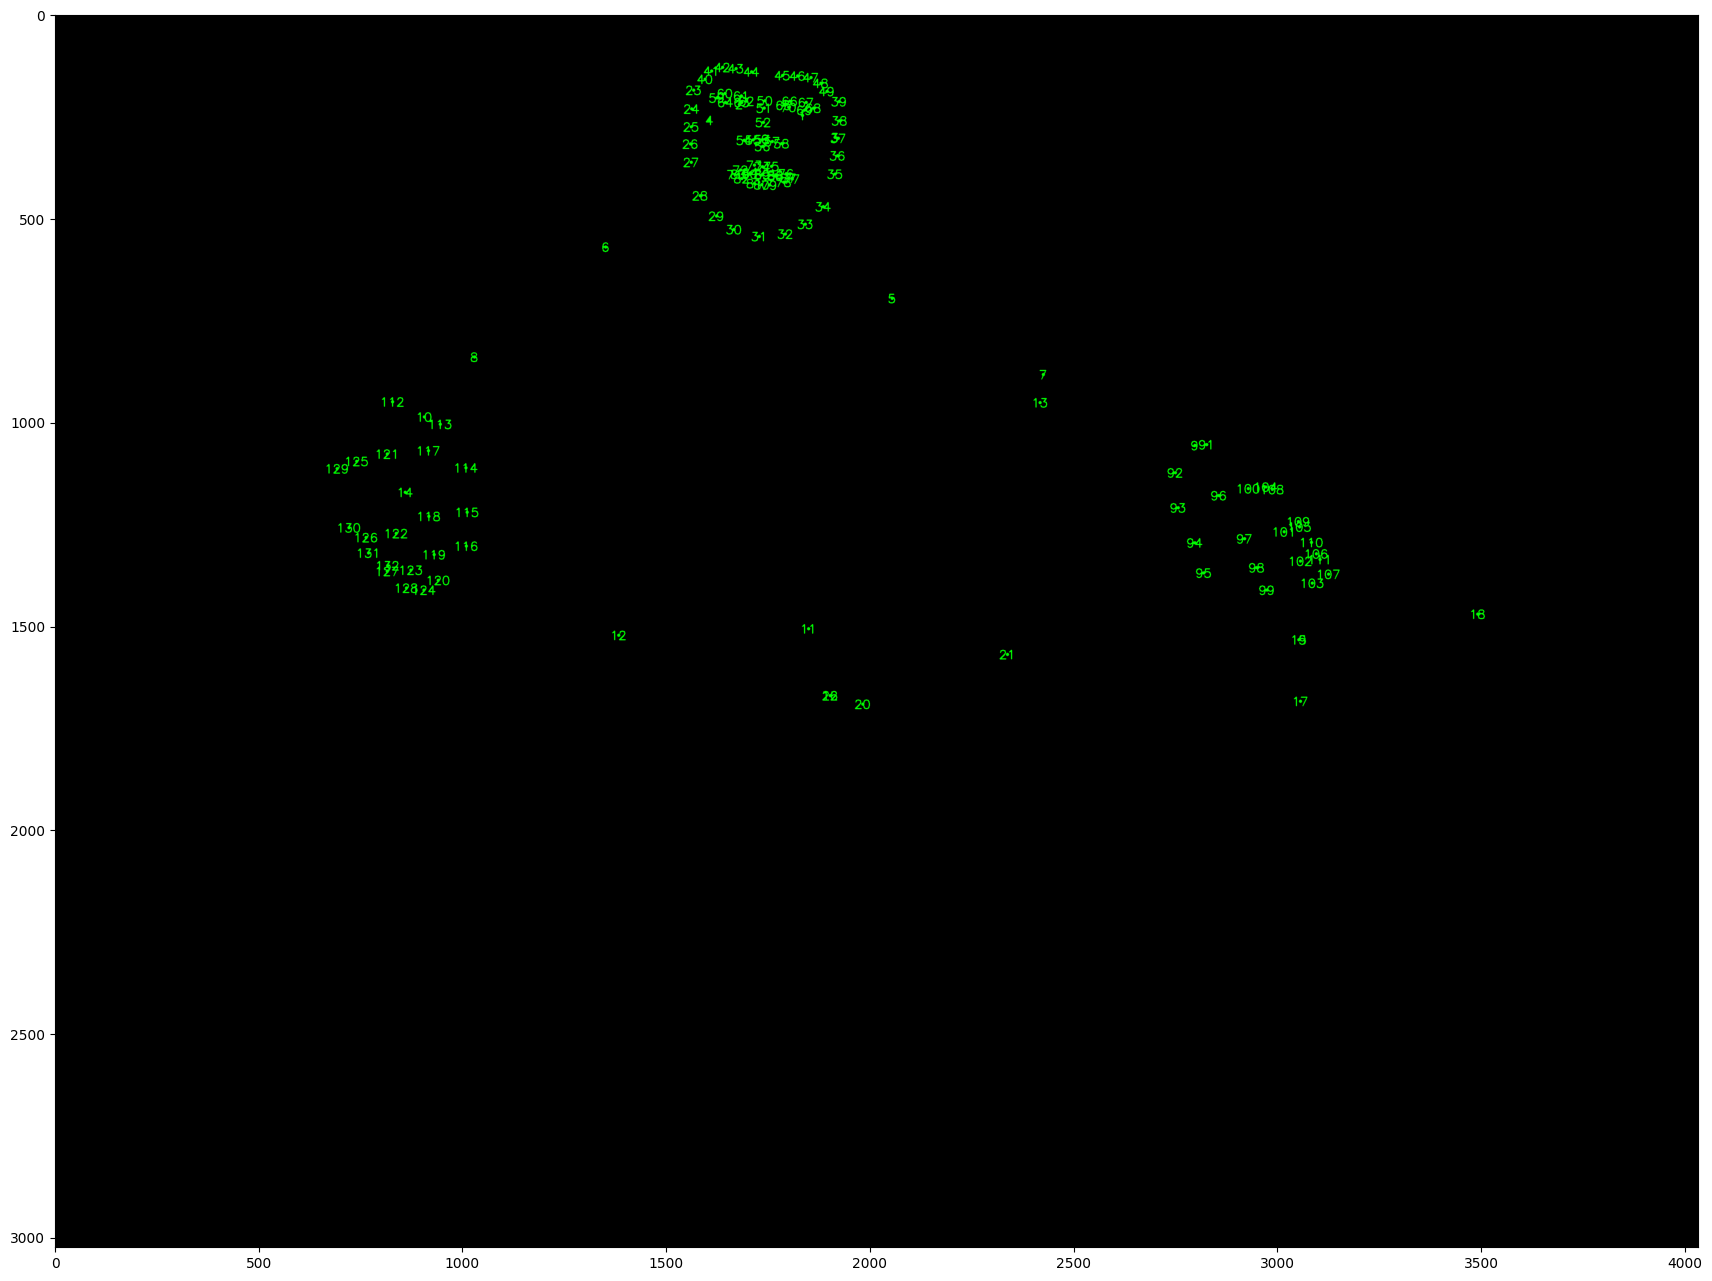

In [31]:
import cv2
import numpy as np


width = img_rgb.shape[1]
height = img_rgb.shape[0]

# Crear una imagen negra
img = np.zeros((height, width, 3), dtype=np.uint8)

# Definir el color y tamaño del texto y círculos
color = (0, 255, 0)  # Verde
circle_radius = 5
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

# Plotear los círculos con el ID de los puntos
for i, (x, y) in enumerate(keypoints):
    print(x,y,i)
    x = int(x * width)
    y = int(y * height)
    # Dibujar el círculo
    img = cv2.circle(img, (x, y), 4, color, -1)
    
    # Dibujar el ID del punto
    text = str(i)
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_x = x - text_size[0] // 2
    text_y = y + text_size[1] // 2
    img = cv2.putText(img, text, (text_x, text_y), font, 1, color, thickness)

    #img = cv2.resize(img,(2016,1512))
# Mostrar la imagen resultante
fig = plt.figure(figsize=(30,16))
plt.imshow(img)
plt.show()

(1, 133)
(1, 133, 2)


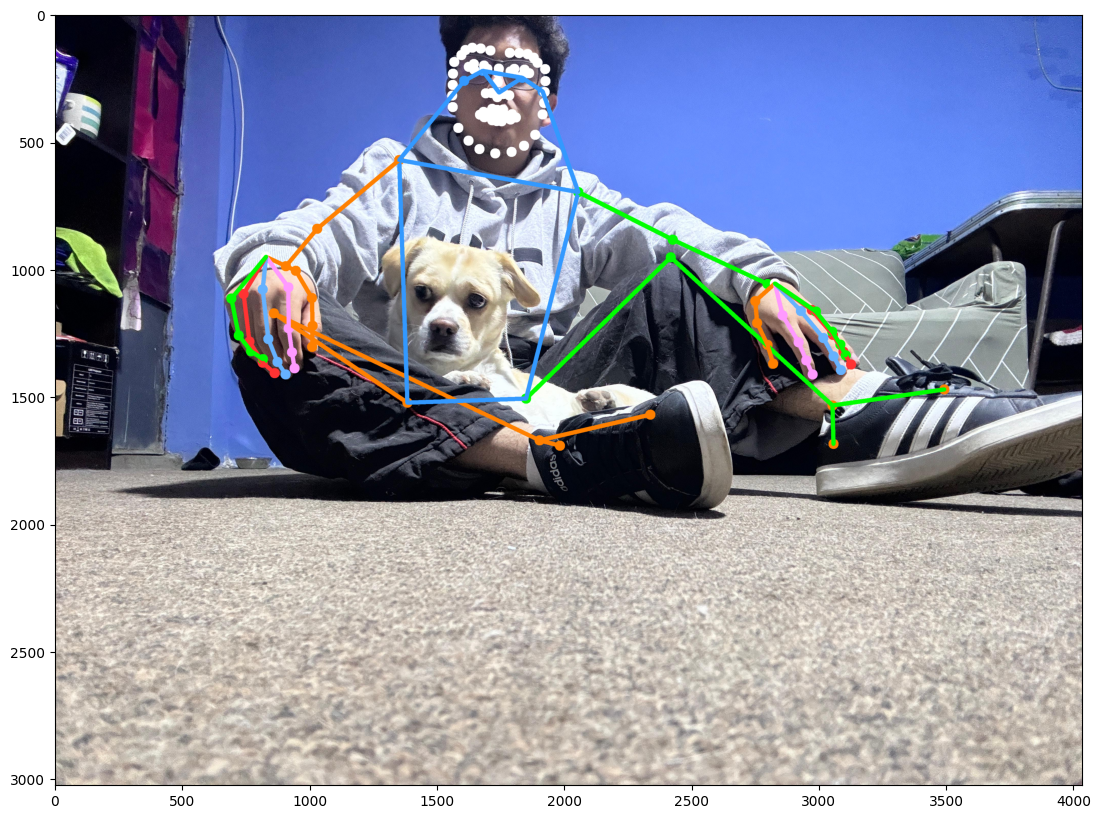

In [32]:
from rtmlib import Wholebody, draw_skeleton
import copy 

width = img_rgb.shape[1]
height = img_rgb.shape[0]
keypoints_new = []
for i, (x, y) in enumerate(keypoints):
    x = int(x * width)
    y = int(y * height)
    keypoints_new.append([x,y])

scores_new = np.array(scores).reshape((133,1))
keypoints_new = np.array(keypoints_new)
scores_new = np.moveaxis(scores_new, 0, 1)
#keypoints_new = np.moveaxis(keypoints_new, 0, 1)
keypoints_new = np.expand_dims(keypoints_new, axis=0)
#(1, 133, 2)
#(1, 133)
print(scores_new.shape)
print(keypoints_new.shape)
img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints_new, scores_new, kpt_thr=0.5,
                             line_width=15,radius=20)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb_new2)
plt.show()

In [33]:

FACEMESH_LIPS = [(61, 146), (146, 91), (91, 181), (181, 84), (84, 17),
                           (17, 314), (314, 405), (405, 321), (321, 375),
                           (375, 291), (61, 185), (185, 40), (40, 39), (39, 37),
                           (37, 0), (0, 267),
                           (267, 269), (269, 270), (270, 409), (409, 291),
                           (78, 95), (95, 88), (88, 178), (178, 87), (87, 14),
                           (14, 317), (317, 402), (402, 318), (318, 324),
                           (324, 308), (78, 191), (191, 80), (80, 81), (81, 82),
                           (82, 13), (13, 312), (312, 311), (311, 310),
                           (310, 415), (415, 308)]
FACEMESH_LIPS = list(set([v[0] for v in FACEMESH_LIPS]+[v[1] for v in FACEMESH_LIPS]))


FACEMESH_LEFT_EYE = [(263, 249), (249, 390), (390, 373), (373, 374),
                               (374, 380), (380, 381), (381, 382), (382, 362),
                               (263, 466), (466, 388), (388, 387), (387, 386),
                               (386, 385), (385, 384), (384, 398), (398, 362)]
FACEMESH_LEFT_EYE = list(set([v[0] for v in FACEMESH_LEFT_EYE]+[v[1] for v in FACEMESH_LEFT_EYE]))


FACEMESH_LEFT_IRIS = [(474, 475), (475, 476), (476, 477),
                                 (477, 474)]
FACEMESH_LEFT_IRIS = list(set([v[0] for v in FACEMESH_LEFT_IRIS]+[v[1] for v in FACEMESH_LEFT_IRIS]))


FACEMESH_LEFT_EYEBROW = [(276, 283), (283, 282), (282, 295),
                                   (295, 285), (300, 293), (293, 334),
                                   (334, 296), (296, 336)]
FACEMESH_LEFT_EYEBROW = list(set([v[0] for v in FACEMESH_LEFT_EYEBROW]+[v[1] for v in FACEMESH_LEFT_EYEBROW]))

FACEMESH_RIGHT_EYE = [(33, 7), (7, 163), (163, 144), (144, 145),
                                (145, 153), (153, 154), (154, 155), (155, 133),
                                (33, 246), (246, 161), (161, 160), (160, 159),
                                (159, 158), (158, 157), (157, 173), (173, 133)]
FACEMESH_RIGHT_EYE = list(set([v[0] for v in FACEMESH_RIGHT_EYE]+[v[1] for v in FACEMESH_RIGHT_EYE]))

FACEMESH_RIGHT_EYEBROW = [(46, 53), (53, 52), (52, 65), (65, 55),
                                    (70, 63), (63, 105), (105, 66), (66, 107)]
FACEMESH_RIGHT_EYEBROW = list(set([v[0] for v in FACEMESH_RIGHT_EYEBROW]+[v[1] for v in FACEMESH_RIGHT_EYEBROW]))

FACEMESH_RIGHT_IRIS = [(469, 470), (470, 471), (471, 472),
                                 (472, 469)]
FACEMESH_RIGHT_IRIS = list(set([v[0] for v in FACEMESH_RIGHT_IRIS]+[v[1] for v in FACEMESH_RIGHT_IRIS]))

FACEMESH_FACE_OVAL = [(10, 338), (338, 297), (297, 332), (332, 284),
                                (284, 251), (251, 389), (389, 356), (356, 454),
                                (454, 323), (323, 361), (361, 288), (288, 397),
                                (397, 365), (365, 379), (379, 378), (378, 400),
                                (400, 377), (377, 152), (152, 148), (148, 176),
                                (176, 149), (149, 150), (150, 136), (136, 172),
                                (172, 58), (58, 132), (132, 93), (93, 234),
                                (234, 127), (127, 162), (162, 21), (21, 54),
                                (54, 103), (103, 67), (67, 109), (109, 10)]
FACEMESH_FACE_OVAL = list(set([v[0] for v in FACEMESH_FACE_OVAL]+[v[1] for v in FACEMESH_FACE_OVAL]))

FACEMESH_NOSE = [(168, 6), (6, 197), (197, 195), (195, 5),
                           (5, 4), (4, 1), (1, 19), (19, 94), (94, 2), (98, 97),
                           (97, 2), (2, 326), (326, 327), (327, 294),
                           (294, 278), (278, 344), (344, 440), (440, 275),
                           (275, 4), (4, 45), (45, 220), (220, 115), (115, 48),
                           (48, 64), (64, 98)]
FACEMESH_NOSE = list(set([v[0] for v in FACEMESH_NOSE]+[v[1] for v in FACEMESH_NOSE]))


In [34]:
FACEMESH_LIPS.sort()

FACEMESH_LEFT_EYE.sort()
FACEMESH_LEFT_IRIS.sort()
FACEMESH_LEFT_EYEBROW.sort()

FACEMESH_RIGHT_EYE.sort()
FACEMESH_RIGHT_IRIS.sort()
FACEMESH_RIGHT_EYEBROW.sort()

FACEMESH_FACE_OVAL.sort()

#FACEMESH_NOSE.sort()

In [35]:
len(FACEMESH_LIPS)

40

In [36]:
len(FACEMESH_LEFT_EYE)

16

In [37]:
len(FACEMESH_LEFT_EYEBROW)

10

In [38]:
len(FACEMESH_FACE_OVAL)

36

In [39]:
ids_conect = FACEMESH_LIPS+FACEMESH_LEFT_EYE+FACEMESH_LEFT_IRIS+FACEMESH_LEFT_EYEBROW

ids_conect += FACEMESH_RIGHT_EYE+FACEMESH_RIGHT_IRIS+FACEMESH_RIGHT_EYEBROW + FACEMESH_FACE_OVAL

In [40]:
ids_points_face = list(set(list(range(len(keypoints_face))))-set(ids_conect))

In [41]:
for i in range(len(FACEMESH_FACE_OVAL)):
    print(i,FACEMESH_FACE_OVAL[i])

0 10
1 21
2 54
3 58
4 67
5 93
6 103
7 109
8 127
9 132
10 136
11 148
12 149
13 150
14 152
15 162
16 172
17 176
18 234
19 251
20 284
21 288
22 297
23 323
24 332
25 338
26 356
27 361
28 365
29 377
30 378
31 379
32 389
33 397
34 400
35 454


In [42]:
import cv2
import numpy as np

# Dimensiones de la imagen
width = 4032
height = 3024

# Crear una imagen negra
img = np.zeros((height, width, 3), dtype=np.uint8)

# Definir el color y tamaño del texto y círculos
color = (0, 255, 0)  # Verde
circle_radius = 5
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

# Plotear los círculos con el ID de los puntos
for i, (x, y) in enumerate(keypoints_face[ids_points_face]):
    i = ids_points_face[i]
    # Escalar las coordenadas al tamaño de la imagen
    
    #######FACE##########
    #x = int((x * width)*5.5)-8000
    #y = int((y * height)*5.5)-50

    
    # LEFT EYE
    #x = int((x * width)*15.9)-25900
    #y = int((y * height)*20.9)-3000
    
    # LEFT EYEBROW
    #x = int((x * width)*15.9)-26300
    #y = int((y * height)*20.9)-2800

    #x = int((x * width)*15.9)-25200
    #y = int((y * height)*20.9)-2400

    x = int((x * width)*16.2)-26200
    y = int((y * height)*21.3)-4000
    # Dibujar el círculo
    img = cv2.circle(img, (x, y), 4, color, -1)
    
    # Dibujar el ID del punto
    text = str(i)
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_x = x - text_size[0] // 2
    text_y = y + text_size[1] // 2
    img = cv2.putText(img, text, (text_x, text_y), font, 1, color, thickness)

    #img = cv2.resize(img,(2016,1512))
# Mostrar la imagen resultante
#cv2.imshow("Keypoints", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [43]:
x,y

(4024, 673)

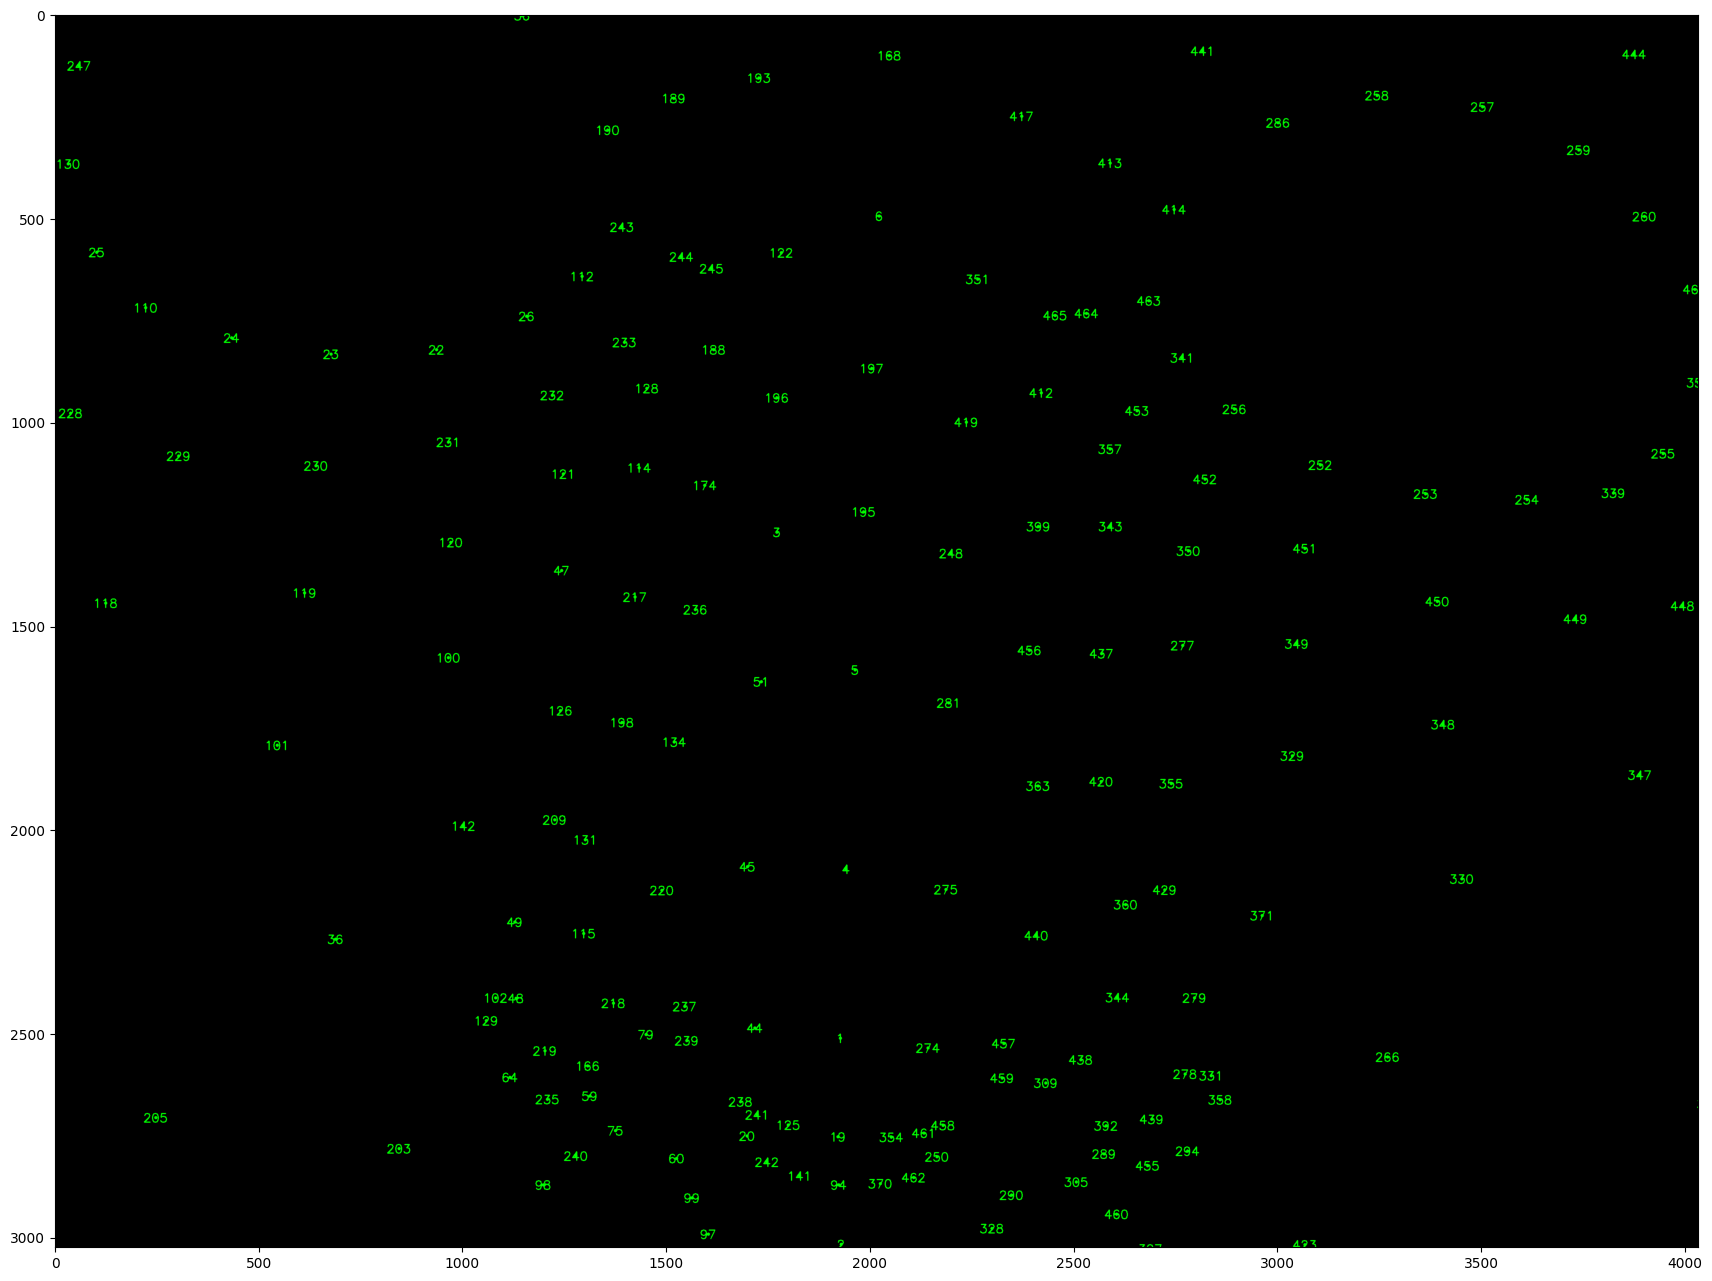

In [44]:
fig = plt.figure(figsize=(30,16))
plt.imshow(img)
plt.show()

In [45]:
#17